# Inspect results
Use this notebook to plot reliability diagrams and scatter plots.

In [17]:
import torch
import matplotlib.pyplot as plt
from pathlib import Path

In [18]:
data_dir = Path('..') / 'data'
map_data = torch.load(data_dir / 'map_probs.pt')
lap_data = torch.load(data_dir / 'laplace_probs.pt')
probs_map = map_data['probs']
labels = map_data['labels']
probs_laplace = lap_data['probs']

In [19]:
def reliability_diagram(probs, labels, n_bins=15, label=None):
    conf = probs.max(1).values
    preds = probs.argmax(1)
    bins = torch.linspace(0, 1, n_bins + 1)
    accs, confs = [], []
    for i in range(n_bins):
        mask = (conf >= bins[i]) & (conf < bins[i+1])
        if mask.any():
            accs.append((preds[mask] == labels[mask]).float().mean().item())
            confs.append(conf[mask].mean().item())
    plt.plot(confs, accs, marker='o', label=label)


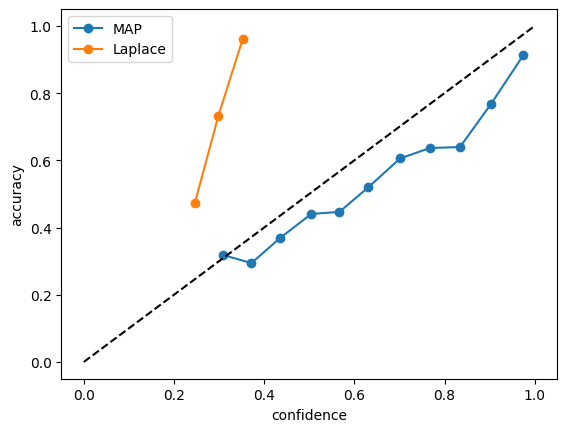

In [20]:
plt.figure()
reliability_diagram(probs_map, labels, label='MAP')
reliability_diagram(probs_laplace, labels, label='Laplace')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('confidence')
plt.ylabel('accuracy')
plt.legend()
plt.show()

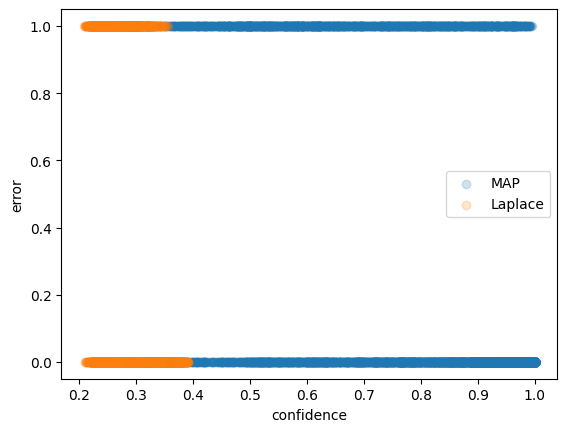

In [21]:
conf_map = probs_map.max(1).values
err_map = (probs_map.argmax(1) != labels).float()
conf_lap = probs_laplace.max(1).values
err_lap = (probs_laplace.argmax(1) != labels).float()
plt.figure()
plt.scatter(conf_map, err_map, alpha=0.2, label='MAP')
plt.scatter(conf_lap, err_lap, alpha=0.2, label='Laplace')
plt.xlabel('confidence')
plt.ylabel('error')
plt.legend()
plt.show()

In [22]:
scores_map = torch.load(data_dir / 'map_scores.pt')
print('MAP acc:', scores_map['acc'], 'ECE:', scores_map['ece'])
scores_lap = torch.load(data_dir / 'laplace_probs.pt') if (data_dir / 'laplace_probs.pt').exists() else None

MAP acc: 0.6773999929428101 ECE: 0.10257543623447418
